<a href="https://colab.research.google.com/github/enriqueperez-uees/UEES-ML-Grupo9_Tarea2Sem3/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ETAPA 1 - 0. IMPORTS Y CONFIG
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
RND = 42

sns.set(style="whitegrid")


In [ ]:
# ETAPA 2 - 1 Importar data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mustafahabeeb90/cybersecurity-incident-dataset")

print("Path to dataset files:", path)

100%|██████████| 3.81M/3.81M [00:00<00:00, 4.11MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mustafahabeeb90/cybersecurity-incident-dataset/versions/1


In [ ]:
import os

path = "/root/.cache/kagglehub/datasets/mustafahabeeb90/cybersecurity-incident-dataset/versions/1"
os.listdir(path)

['cybersecurity synthesized data.csv']

<Figure size 1200x800 with 0 Axes>

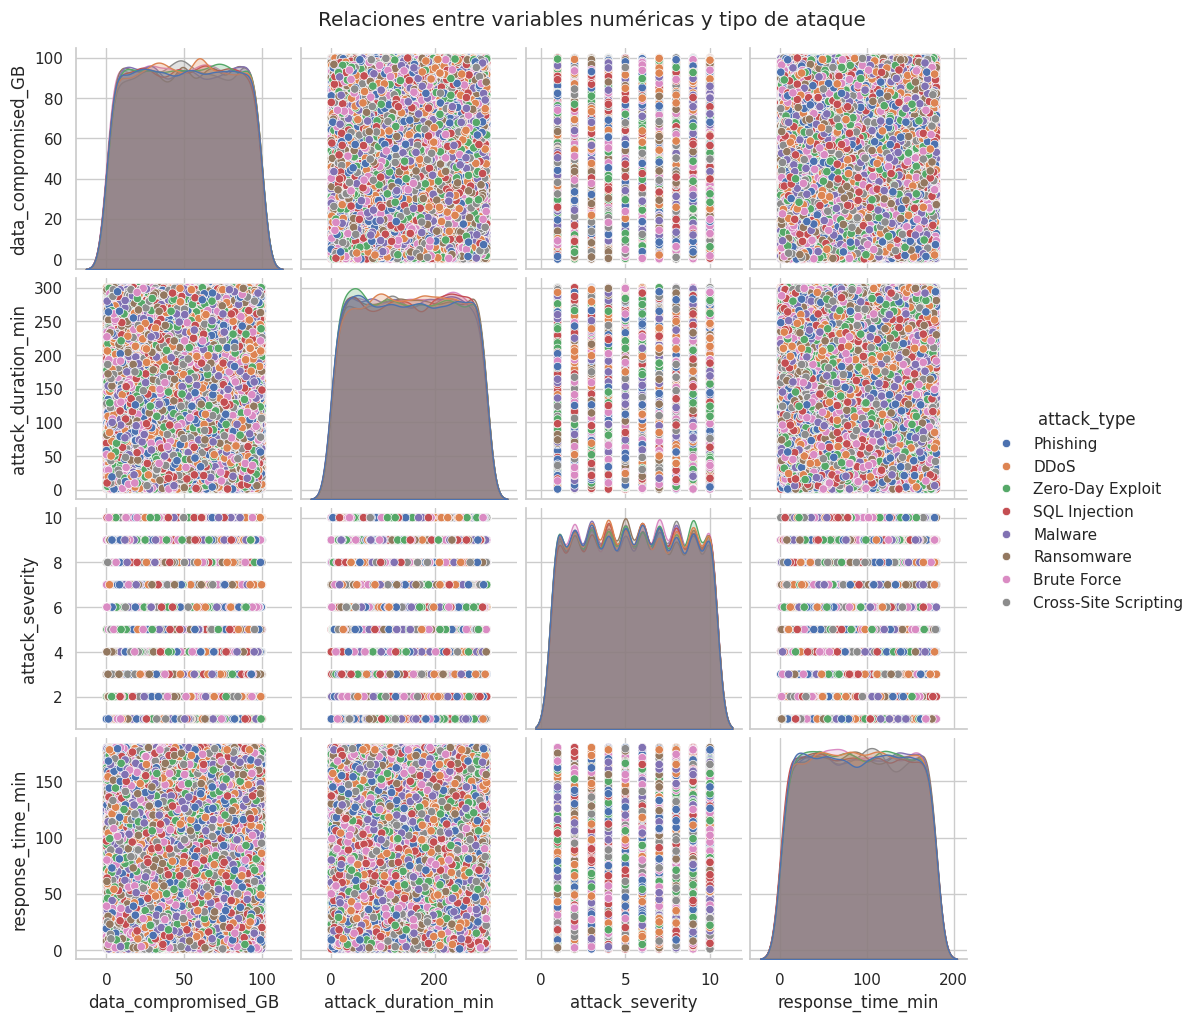

In [ ]:
import pandas as pd

ruta = path + "/cybersecurity synthesized data.csv"
df = pd.read_csv(ruta)

# Ver las primeras filas
df.head()

import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de correlaciones entre variables numéricas
plt.figure(figsize=(12, 8))
sns.pairplot(
    df,
    vars=['data_compromised_GB', 'attack_duration_min', 'attack_severity', 'response_time_min'],
    hue='attack_type',  # 🔹 Cambia este nombre si tu variable objetivo es otra
    diag_kind='kde'
)
plt.suptitle('Relaciones entre variables numéricas y tipo de ataque', y=1.02)
plt.savefig('pairplot.png')
plt.show()


1. ANÁLISIS EXPLORATORIO (EDA)

In [ ]:
# ETAPA 3 -
# 3.1. - 2. ANÁLISIS EXPLORATORIO (EDA)
print("Dimensiones:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)

Dimensiones: (100000, 15)


,attack_type,target_system,outcome,timestamp,attacker_ip,target_ip,data_compromised_GB,attack_duration_min,security_tools_used,user_role,location,attack_severity,industry,response_time_min,mitigation_method
0,Phishing,Cloud Service,Failure,2024-04-03 11:13:15.083419,21.166.79.4,23.20.50.78,15.31,300,Firewall,Employee,Australia,2,Energy,164,Containment
1,DDoS,Email Server,Success,2024-02-03 20:51:56.083463,187.180.150.169,34.160.58.218,65.05,242,Endpoint Detection,Admin,Brazil,10,Retail,64,Reset Credentials
2,Zero-Day Exploit,Cloud Service,Success,2024-07-19 18:40:05.083472,57.161.159.140,213.142.125.206,48.99,120,Firewall,External User,Germany,7,Finance,87,Quarantine
3,SQL Injection,Email Server,Failure,2023-12-08 00:54:17.083478,207.108.16.104,4.104.193.49,16.29,286,MFA,Employee,Russia,3,Healthcare,23,Patch
4,Zero-Day Exploit,IoT Device,Failure,2024-07-23 05:38:20.083483,98.122.15.31,57.66.53.194,87.66,4,Firewall,Contractor,UK,6,Finance,129,Containment


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   attack_type          100000 non-null  object 
 1   target_system        100000 non-null  object 
 2   outcome              100000 non-null  object 
 3   timestamp            100000 non-null  object 
 4   attacker_ip          100000 non-null  object 
 5   target_ip            100000 non-null  object 
 6   data_compromised_GB  100000 non-null  float64
 7   attack_duration_min  100000 non-null  int64  
 8   security_tools_used  100000 non-null  object 
 9   user_role            100000 non-null  object 
 10  location             100000 non-null  object 
 11  attack_severity      100000 non-null  int64  
 12  industry             100000 non-null  object 
 13  response_time_min    100000 non-null  int64  
 14  mitigation_method    100000 non-null  object 
dtypes: float64(1), int

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
attack_type,100000,8,Brute Force,12605,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_system,100000,8,Cloud Service,12641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outcome,100000,2,Success,50030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,100000,100000,2024-07-21 20:24:07.650625,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacker_ip,100000,100000,116.168.157.39,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_ip,100000,99997,166.34.142.134,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_compromised_GB,100000.0,NaN,NaN,NaN,50.062586,28.829756,0.0,25.17,50.06,74.97,100.0
attack_duration_min,100000.0,NaN,NaN,NaN,151.07059,86.733278,1.0,76.0,151.0,226.0,300.0
security_tools_used,100000,8,SIEM,12668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_role,100000,4,Admin,25114,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Revisar nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
attack_type            0
target_system          0
outcome                0
timestamp              0
attacker_ip            0
target_ip              0
data_compromised_GB    0
attack_duration_min    0
security_tools_used    0
user_role              0
location               0
attack_severity        0
industry               0
response_time_min      0
mitigation_method      0
dtype: int64


In [ ]:
# Columnas numéricas y categóricas según tu info previa:
num_cols = ['data_compromised_GB', 'attack_duration_min', 'attack_severity', 'response_time_min']
cat_cols = ['attack_type', 'target_system', 'security_tools_used', 'user_role', 'location', 'industry', 'mitigation_method']


In [ ]:
# Conteos y top categorías
for c in cat_cols:
    print(f"--- {c} (n={df[c].nunique()}) ---")
    display(df[c].value_counts().head(8))

--- attack_type (n=8) ---


,count
attack_type,
Brute Force,12605
DDoS,12557
Zero-Day Exploit,12555
Ransomware,12499
Malware,12469
SQL Injection,12463
Phishing,12441
Cross-Site Scripting,12411


--- target_system (n=8) ---


,count
target_system,
Cloud Service,12641
Email Server,12634
Web Server,12587
Database,12480
Network Switch,12476
IoT Device,12466
User Account,12442
API,12274


--- security_tools_used (n=8) ---


,count
security_tools_used,
SIEM,12668
IDS,12589
Endpoint Detection,12578
Antivirus,12481
VPN,12461
MFA,12456
Firewall,12400
WAF,12367


--- user_role (n=4) ---


,count
user_role,
Admin,25114
Employee,24998
External User,24971
Contractor,24917


--- location (n=10) ---


,count
location,
Brazil,10133
USA,10055
Canada,10049
China,10041
Germany,10009
Russia,9983
France,9972
UK,9966


--- industry (n=8) ---


,count
industry,
Government,12645
Manufacturing,12608
Education,12556
Retail,12521
Energy,12502
Finance,12435
Healthcare,12368
Technology,12365


--- mitigation_method (n=5) ---


,count
mitigation_method,
Patch,20151
Block IP,20072
Containment,19997
Reset Credentials,19944
Quarantine,19836


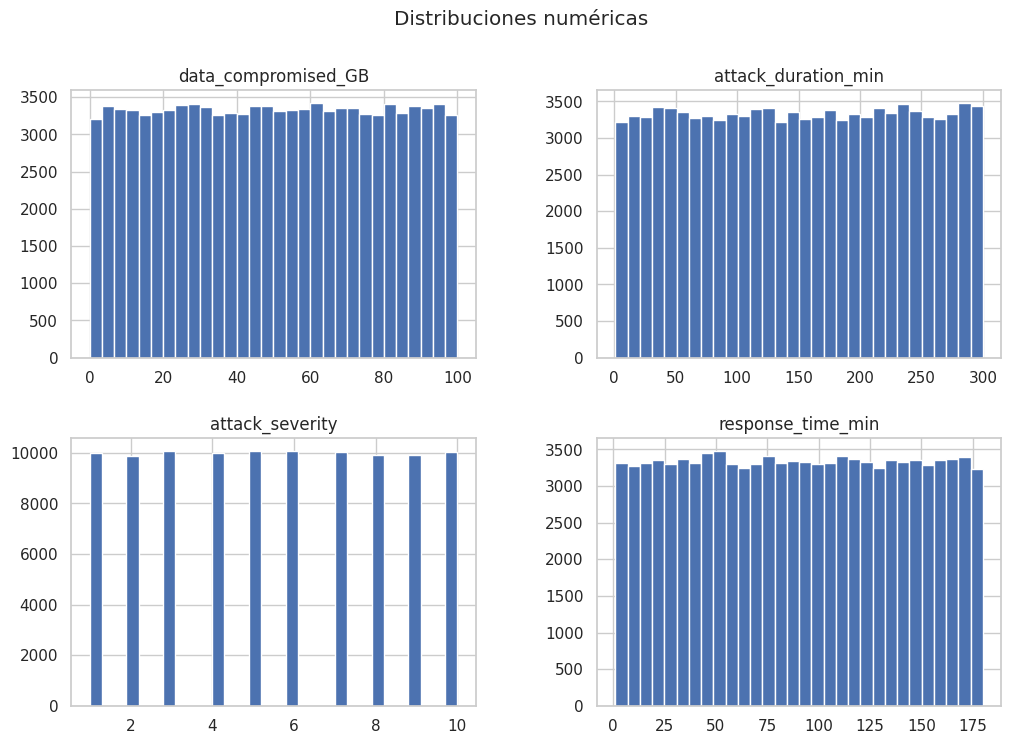

In [ ]:
# Distribuciones numéricas
df[num_cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribuciones numéricas")
plt.show()
#¿Hay ataques que duran mucho más que otros?

#¿Hay datos muy grandes comprometidos (outliers)?

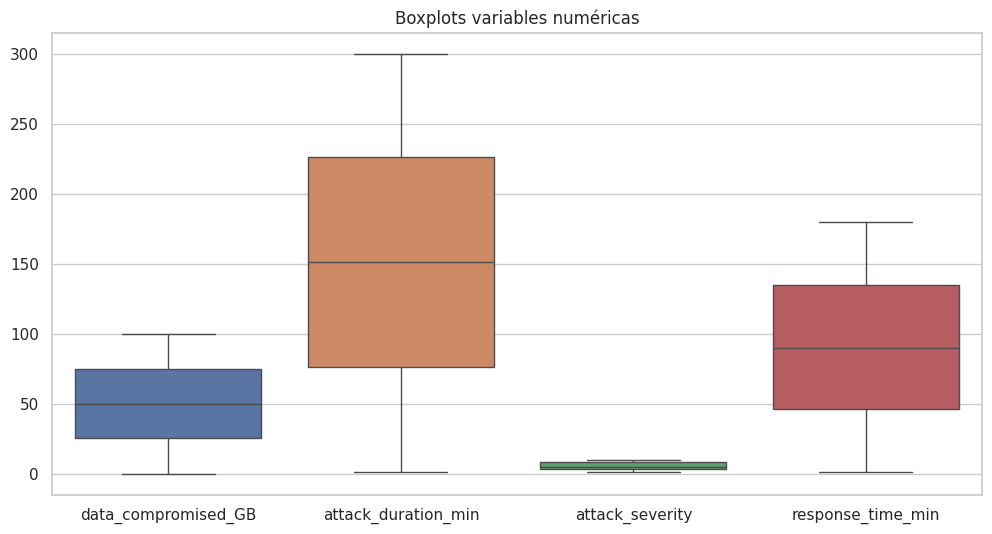

In [ ]:
# 3.2 Boxplots para outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots variables numéricas")
plt.show()

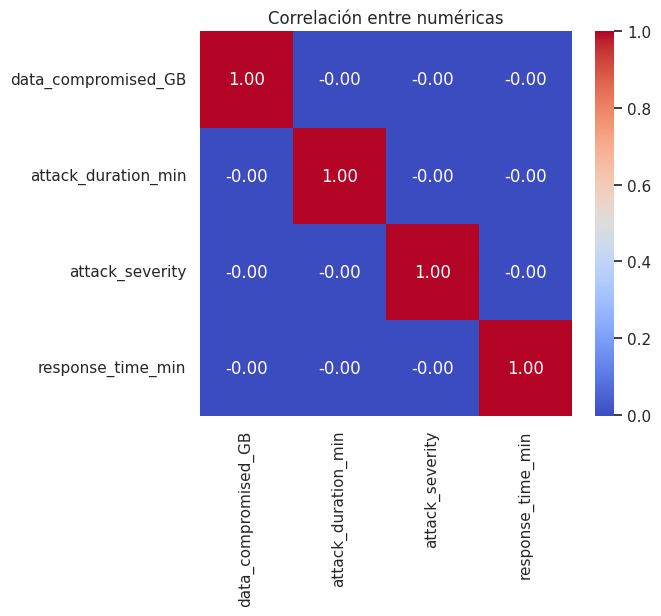

In [ ]:
# Correlación entre numéricas
plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación entre numéricas")
plt.show()
#Si los ataques más severos duran más.

#Si el tiempo de respuesta se relaciona con la cantidad de datos comprometidos.

In [ ]:
# Conteo de la variable objetivo
print("Distribución de 'outcome':")
display(df['outcome'].value_counts(normalize=False))
display(df['outcome'].value_counts(normalize=True))

Distribución de 'outcome':


,count
outcome,
Success,50030
Failure,49970


,proportion
outcome,
Success,0.5003
Failure,0.4997


In [ ]:
# Distribución de la variable objetivo
target_col = "Purchased"   # ajusta si se llama distinto
if target_col not in df.columns:
    # si no existe, intenta adivinar la última columna
    target_col = df.columns[-1]
print("Usando target:", target_col)
display(df[target_col].value_counts(normalize=True).rename("proportion"))
# Resumen estadístico de variables numéricas
df.describe()

Usando target: mitigation_method


,proportion
mitigation_method,
Patch,0.20151
Block IP,0.20072
Containment,0.19997
Reset Credentials,0.19944
Quarantine,0.19836


,data_compromised_GB,attack_duration_min,attack_severity,response_time_min
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.062586,151.070590,5.498990,90.454450
std,28.829756,86.733278,2.869718,51.905376
min,0.000000,1.000000,1.000000,1.000000
25%,25.170000,76.000000,3.000000,46.000000
50%,50.060000,151.000000,5.000000,90.000000
75%,74.970000,226.000000,8.000000,135.000000
max,100.000000,300.000000,10.000000,180.000000


In [ ]:
cat_cols = ['attack_type', 'target_system', 'outcome', 'security_tools_used',
            'user_role', 'location', 'industry', 'mitigation_method']

for col in cat_cols:
    print(f"{col}: {df[col].nunique()} categorías")


attack_type: 8 categorías
target_system: 8 categorías
outcome: 2 categorías
security_tools_used: 8 categorías
user_role: 4 categorías
location: 10 categorías
industry: 8 categorías
mitigation_method: 5 categorías


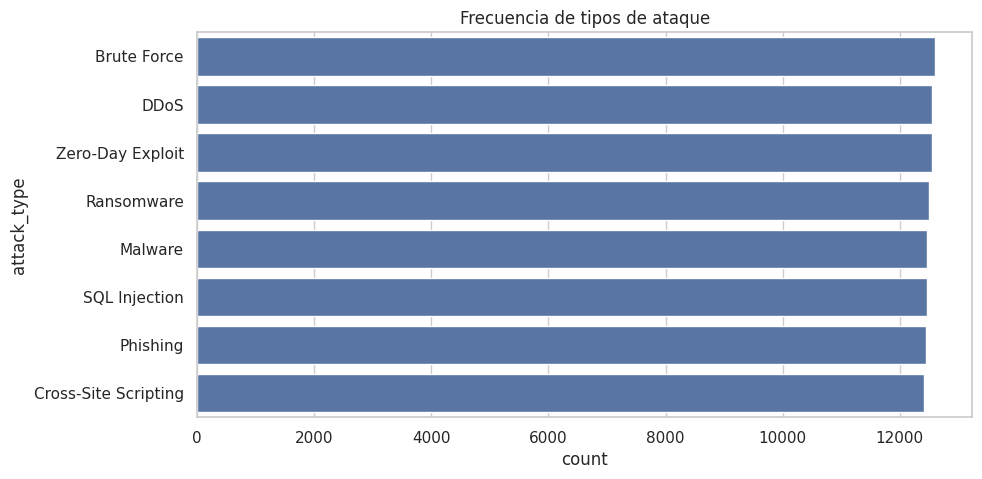

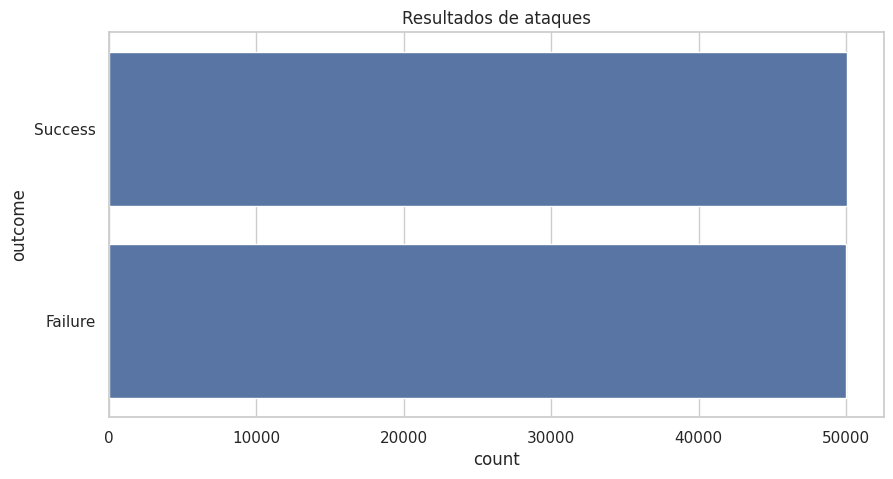

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='attack_type', data=df, order=df['attack_type'].value_counts().index)
plt.title("Frecuencia de tipos de ataque")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y='outcome', data=df, order=df['outcome'].value_counts().index)
plt.title("Resultados de ataques")
plt.show()


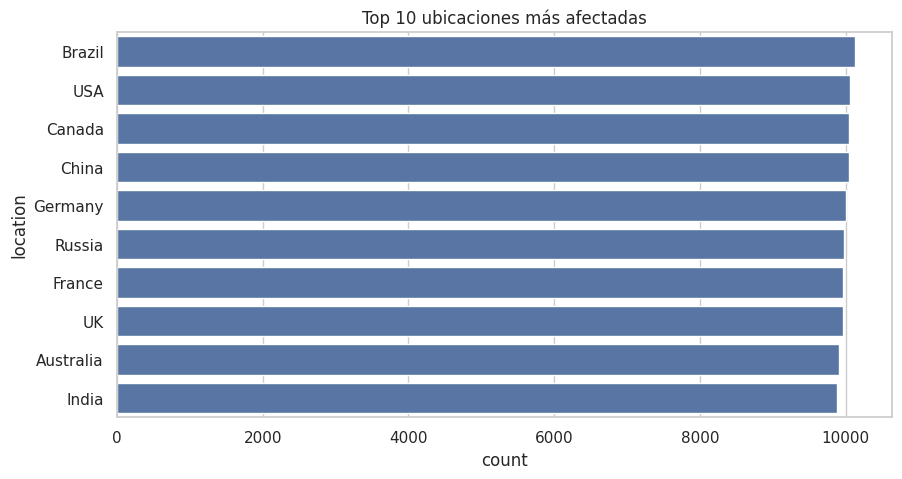

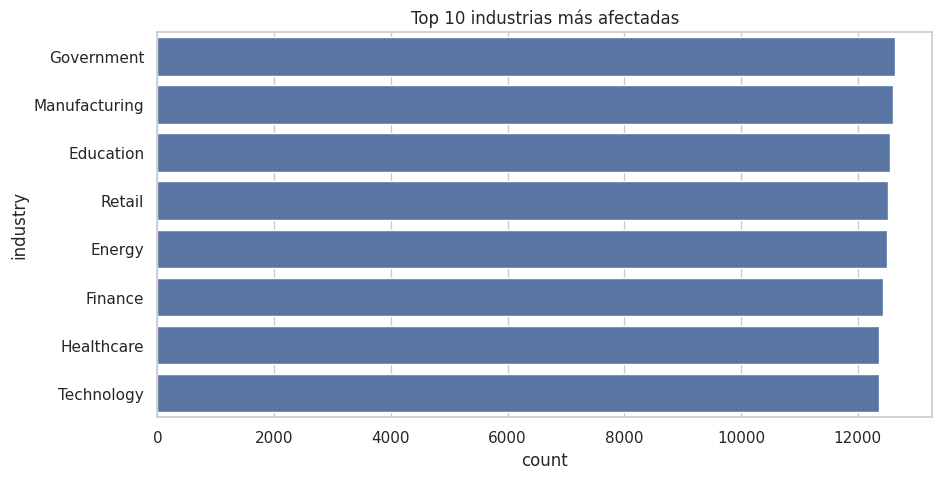

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='location', data=df, order=df['location'].value_counts().head(10).index)
plt.title("Top 10 ubicaciones más afectadas")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y='industry', data=df, order=df['industry'].value_counts().head(10).index)
plt.title("Top 10 industrias más afectadas")
plt.show()


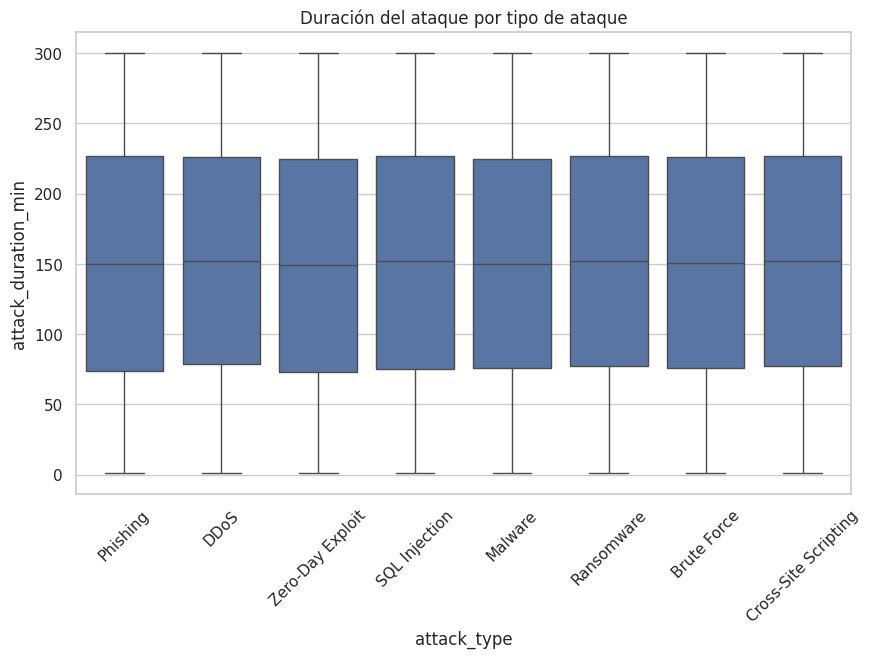

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='attack_type', y='attack_duration_min', data=df)
plt.xticks(rotation=45)
plt.title("Duración del ataque por tipo de ataque")
plt.show()


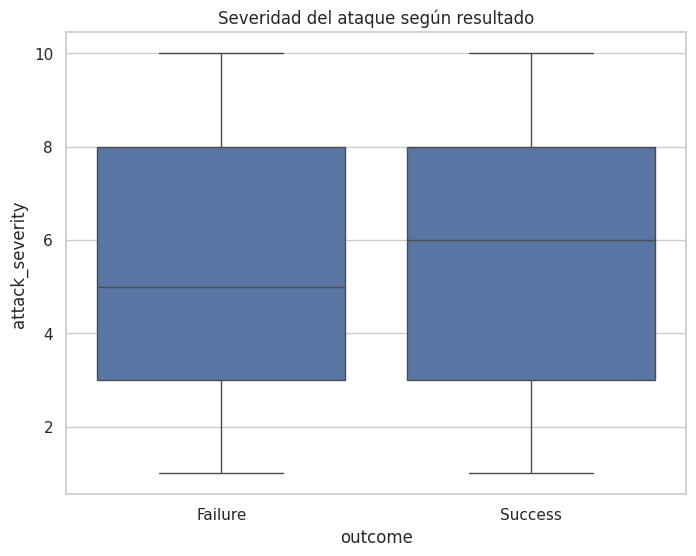

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='outcome', y='attack_severity', data=df)
plt.title("Severidad del ataque según resultado")
plt.show()


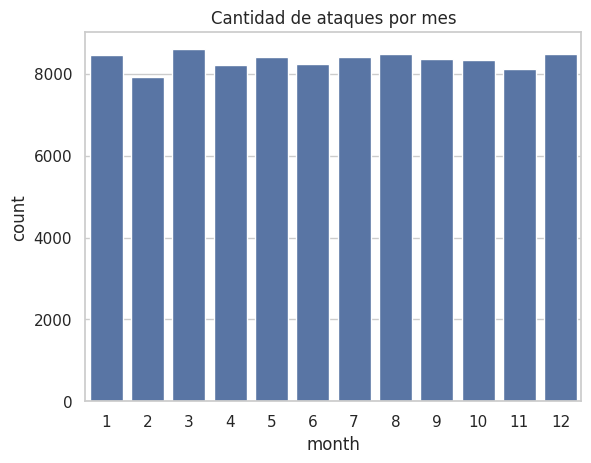

In [ ]:
#Análisis temporal
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
sns.countplot(x='month', data=df)
plt.title("Cantidad de ataques por mes")
plt.show()


**2. Implementación del modelo (SVM, Árbol de Decisión y Random Forest)**

In [ ]:
# ETAPA 4 - 2. Preprocesamiento recomendado
# --------------------------
# - Convertir timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
# Extraer features temporales útiles
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour
# Añadir month/hour a listas si los quieres usar
temporal_cols = ['month', 'hour']
# - Eliminar columnas no útiles para modelado directo (IPs)
drop_cols = ['attacker_ip', 'target_ip', 'timestamp']  # ip no aportan directamente; timestamp ya procesado


In [ ]:
# Importar LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Target encoding: convertir la variable objetivo (outcome) a números
y = df['outcome'].copy()

le_y = LabelEncoder()
y_enc = le_y.fit_transform(y)  # conserva mapping en le_y.classes_

# Verificar cómo se codificaron las clases
print(dict(zip(le_y.classes_, range(len(le_y.classes_)))))


{'Failure': 0, 'Success': 1}


In [ ]:
# - X
X = df.drop(columns=['outcome'] + drop_cols)

# Actualiza listas predictor
# incluir los temporales en num_cols
num_cols_model = num_cols + temporal_cols
# en cat_cols asegurate de no incluir columnas inexistentes
cat_cols_model = [c for c in cat_cols if c in X.columns]


In [ ]:
# --------------------------
# 3. Split train/test (80/20)
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# --------------------------
# 4. Pipelines: preprocessor
# --------------------------
# num pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
# cat pipeline: OneHot (sparse -> to dense via toarray in pipeline)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols_model),
    ('cat', cat_transformer, cat_cols_model)
], remainder='drop')  # drop otras columnas


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Variables categóricas y numéricas según el dataset
cat_features = [
    'attack_type', 'target_system', 'security_tools_used',
    'user_role', 'location', 'industry', 'mitigation_method', 'month'
]

num_features = [
    'data_compromised_GB', 'attack_duration_min',
    'attack_severity', 'response_time_min', 'hour'
]

# Preprocesador: OneHotEncoder para variables categóricas y MinMaxScaler para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# -------------------------------
# Pipelines base para cada modelo
# -------------------------------
pipe_dt = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

pipe_svc = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', SVC(random_state=42))
])

pipe_rf = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])


In [ ]:
# ==========================
# ETAPA 4.1 — Parámetros para búsqueda aleatoria
# ==========================

# Árbol de Decisión
param_grid_dt = {
    'clf__max_depth': [None, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

# SVM — parámetros válidos para SVC
param_grid_svc = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf', 'poly'],
    'clf__gamma': ['scale', 'auto']
}

# Random Forest
param_grid_rf = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}


In [ ]:
# ETAPA 5.1
# --------------------------
# 5. Modelos y RandomizedSearchCV
# --------------------------
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC  # Más rápido que SVC(kernel='rbf')
from scipy.stats import randint, uniform
import pandas as pd

#  Aseguramos que pipe_svc use LinearSVC
# (solo si no lo hiciste antes)
# pipe_svc = Pipeline(steps=[
#     ('preproc', preprocessor),
#     ('clf', LinearSVC(random_state=42, max_iter=5000))
# ])

# ---------------------------------
# RandomizedSearchCV optimizados
# ---------------------------------

rs_dt = RandomizedSearchCV(
    estimator=pipe_dt,
    param_distributions=param_grid_dt,
    cv=3,
    n_iter=5,
    scoring='f1_macro',
    n_jobs=1,
    verbose=2,
    random_state=42
)

rs_svc = RandomizedSearchCV(
    estimator=pipe_svc,
    param_distributions=param_grid_svc,
    cv=2,
    n_iter=3,
    scoring='f1_macro',
    n_jobs=1,
    verbose=2,
    random_state=42
)

rs_rf = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=param_grid_rf,
    cv=3,
    n_iter=5,
    scoring='f1_macro',
    n_jobs=1,
    verbose=2,
    random_state=42
)

# ---------------------------------
# Entrenamiento con muestra (para pruebas)
# ---------------------------------
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_sample = X_train.sample(10000, random_state=42)
y_sample = y_train.loc[X_sample.index]

# ---------------------------------
# Entrenamiento
# ---------------------------------
print("Entrenando Decision Tree...")
rs_dt.fit(X_sample, y_sample)

print("Entrenando SVM ...")
rs_svc.fit(X_sample, y_sample)

print("Entrenando Random Forest...")
rs_rf.fit(X_sample, y_sample)

# ---------------------------------
# Ver mejores resultados
# ---------------------------------
print("\n=== Mejores resultados ===")
print("Árbol de Decisión:", rs_dt.best_params_, "-> F1:", rs_dt.best_score_)
print("SVM (rápido):", rs_svc.best_params_, "-> F1:", rs_svc.best_score_)
print("Random Forest:", rs_rf.best_params_, "-> F1:", rs_rf.best_score_)


Entrenando Decision Tree...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ........clf__max_depth=20, clf__min_samples_split=5; total time=   0.4s
[CV] END ........clf__max_depth=20, clf__min_samples_split=5; total time=   0.3s
[CV] END ........clf__max_depth=20, clf__min_samples_split=5; total time=   0.4s
[CV] END ........clf__max_depth=20, clf__min_samples_split=2; total time=   0.3s
[CV] END ........clf__max_depth=20, clf__min_samples_split=2; total time=   0.3s
[CV] END ........clf__max_depth=20, clf__min_samples_split=2; total time=   0.4s
[CV] END ......clf__max_depth=None, clf__min_samples_split=2; total time=   0.4s
[CV] END ......clf__max_depth=None, clf__min_samples_split=2; total time=   0.5s
[CV] END ......clf__max_depth=None, clf__min_samples_split=2; total time=   0.5s
[CV] END .......clf__max_depth=10, clf__min_samples_split=10; total time=   0.1s
[CV] END .......clf__max_depth=10, clf__min_samples_split=10; total time=   0.1s
[CV] END .......clf__

In [ ]:
modelos = {
    "Árbol de Decisión": rs_dt.best_estimator_,
    "SVM": rs_svc.best_estimator_,
    "Random Forest": rs_rf.best_estimator_
}


**3. Implementación del Árbol de Decisión**

In [ ]:
 #Entrenamiento
print("Entrenando Árbol...")
rs_dt.fit(X_train, y_train)


Entrenando Árbol...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preproc',
                                              ColumnTransformer(transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               ['data_compromised_GB',
                                                                                'attack_duration_min',
                                                                                'attack_severity',
                                                                                'response_time_min',
                                                                                'hour']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['attack_type',
                                                                                'target_system',
                                                                                'security_tools_used',
                                                                                'user_role',
                                                                                'location',
                                                                                'industry',
                                                                                'mitigation_method',
                                                                                'month'])])),
                                             ('clf',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'clf__max_depth': [None, 5, 10, 20],
                                        'clf__min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='f1_macro', verbose=1)

**4. Comparación de modelos y visualización de métricas**

In [ ]:
# ============================================
# ETAPA 6 — COMPARACIÓN DE MÉTRICAS
# ============================================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Diccionario para almacenar resultados
resultados = {}

# Modelos entrenados (los mejores encontrados)
modelos = {
    "Árbol de Decisión": rs_dt.best_estimator_,
    "SVM (Lineal)": rs_svc.best_estimator_,
    "Random Forest": rs_rf.best_estimator_
}

# Evaluar cada modelo
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)

    resultados[nombre] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-Score": f1_score(y_test, y_pred, average='macro')
    }

    print(f"\n Reporte de Clasificación — {nombre}")
    print(classification_report(y_test, y_pred))

# Convertir a DataFrame para comparar fácilmente
df_resultados = pd.DataFrame(resultados).T.round(3)

print("\n Resultados comparativos:")
print(df_resultados)



🔹 Reporte de Clasificación — Árbol de Decisión
              precision    recall  f1-score   support

           0       0.50      0.57      0.53      9994
           1       0.50      0.43      0.47     10006

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


🔹 Reporte de Clasificación — SVM (Lineal)
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      9994
           1       0.50      0.44      0.47     10006

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


🔹 Reporte de Clasificación — Random Forest
              precision    recall  f1-score   support

           0       0.50      0.56      0.53      9994
           1       0.50      0.44      0.47     10006

    accuracy                           0.50    

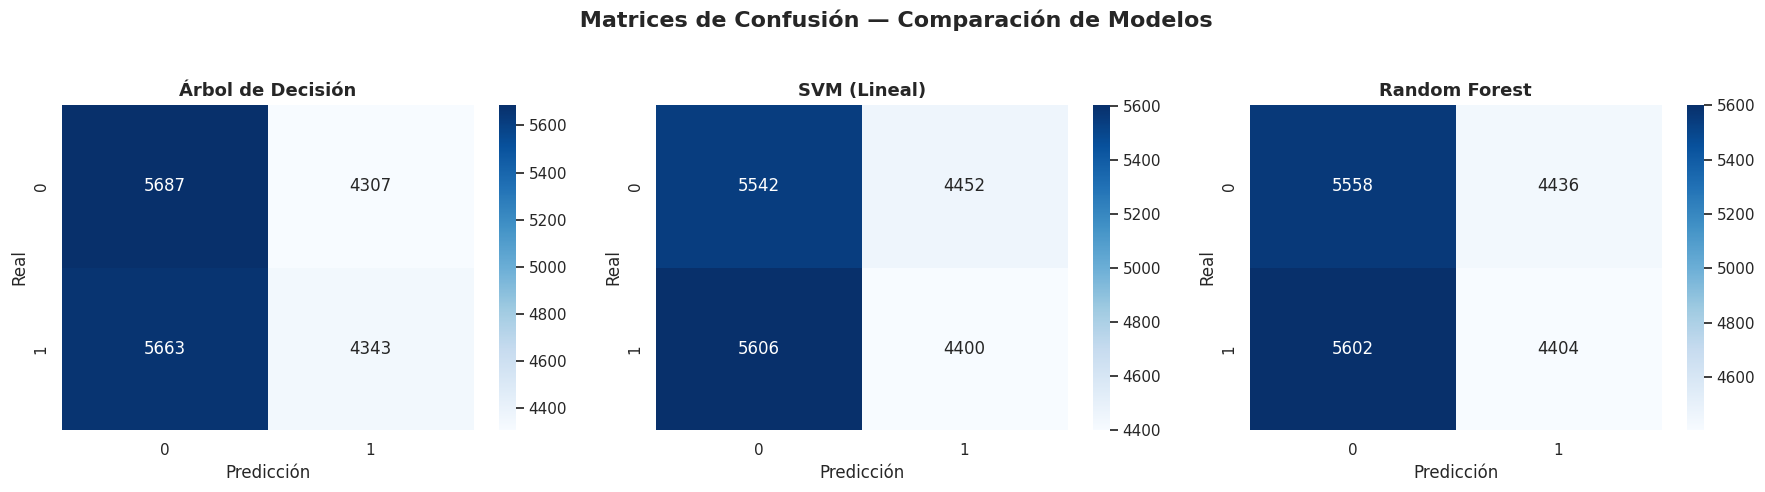

In [ ]:
# ============================================
# ETAPA 7 — VISUALIZACIÓN COMPARATIVA
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear una figura general
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle(" Matrices de Confusión — Comparación de Modelos", fontsize=16, weight='bold')

# Generar las matrices de confusión para cada modelo
modelos_vis = {
    "Árbol de Decisión": rs_dt.best_estimator_,
    "SVM (Lineal)": rs_svc.best_estimator_,
    "Random Forest": rs_rf.best_estimator_
}

for ax, (nombre, modelo) in zip(axes, modelos_vis.items()):
    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(nombre, fontsize=13, weight='bold')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


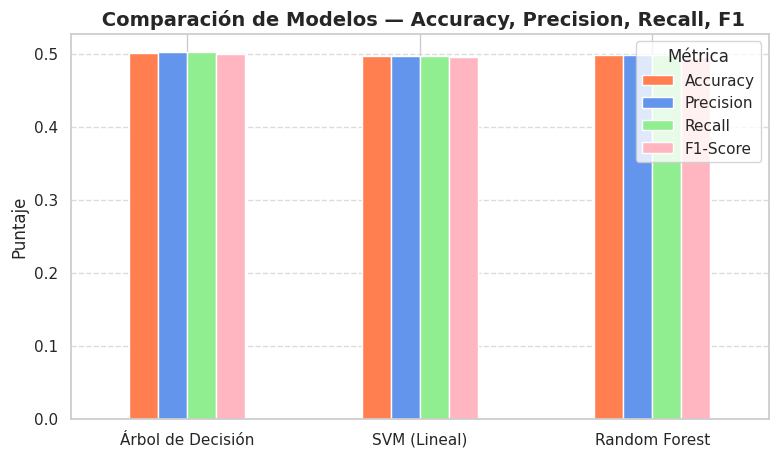

In [ ]:
# Gráfico de barras comparando métricas
df_resultados.plot(kind='bar', figsize=(9,5), color=['#ff7f50','#6495ed','#90ee90','#ffb6c1'])
plt.title(' Comparación de Modelos — Accuracy, Precision, Recall, F1', fontsize=14, weight='bold')
plt.ylabel('Puntaje')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Métrica')
plt.show()


In [ ]:
# ============================================
# ETAPA 8 — REPORTES INDIVIDUALES
# ============================================
from sklearn.metrics import classification_report

for nombre, modelo in modelos_vis.items():
    print("="*60)
    print(f" REPORTE INDIVIDUAL — {nombre}")
    print("="*60)

    y_pred = modelo.predict(X_test)

    print("\n Métricas globales:")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.3f}")
    print(f"Recall:    {recall_score(y_test, y_pred, average='macro'):.3f}")
    print(f"F1-Score:  {f1_score(y_test, y_pred, average='macro'):.3f}")

    print("\n Reporte por clase:")
    print(classification_report(y_test, y_pred))

    print("\nMejor configuración de hiperparámetros:")
    if nombre == "Árbol de Decisión":
        print(rs_dt.best_params_)
    elif nombre == "SVM (Lineal)":
        print(rs_svc.best_params_)
    elif nombre == "Random Forest":
        print(rs_rf.best_params_)


 REPORTE INDIVIDUAL — Árbol de Decisión

 Métricas globales:
Accuracy:  0.501
Precision: 0.502
Recall:    0.502
F1-Score:  0.499

 Reporte por clase:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53      9994
           1       0.50      0.43      0.47     10006

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


Mejor configuración de hiperparámetros:
{'clf__min_samples_split': 5, 'clf__max_depth': 20}
 REPORTE INDIVIDUAL — SVM (Lineal)

 Métricas globales:
Accuracy:  0.497
Precision: 0.497
Recall:    0.497
F1-Score:  0.495

 Reporte por clase:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      9994
           1       0.50      0.44      0.47     10006

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg 

In [ ]:
# --------------------------
# 5. Modelos y GridSearch
# --------------------------
# Definimos 3 pipelines
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# RandomizedSearchCV
rs_dt = RandomizedSearchCV(pipe_dt, param_grid_dt, cv=3, scoring='f1_macro',
                           n_iter=5, n_jobs=-1, verbose=1, random_state=42)

rs_svc = RandomizedSearchCV(pipe_svc, param_grid_svc, cv=3, scoring='f1_macro',
                            n_iter=5, n_jobs=-1, verbose=1, random_state=42)

rs_rf = RandomizedSearchCV(pipe_rf, param_grid_rf, cv=3, scoring='f1_macro',
                           n_iter=5, n_jobs=-1, verbose=1, random_state=42)

